In [17]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array


SIZE = (224, 224)
caminho_bases = os.path.join('..', 'bases', 'chest_xray')
caminho_train = os.path.join(caminho_bases, 'train')
caminho_train_normal = os.path.join(caminho_bases, 'train',  'NORMAL')
caminho_train_pneumonia = os.path.join(caminho_bases, 'train', 'PNEUMONIA')
caminho_test = os.path.join(caminho_bases, 'test')
caminho_test_normal = os.path.join(caminho_bases, 'test',  'NORMAL')
caminho_test_pneumonia = os.path.join(caminho_bases, 'test', 'PNEUMONIA')

In [2]:
destino_bases = os.path.join('..', 'bases', 'chest_xray_augmented')
destino_train = os.path.join(destino_bases, 'train')
destino_train_normal = os.path.join(destino_bases, 'train',  'NORMAL')
destino_train_pneumonia = os.path.join(destino_bases, 'train', 'PNEUMONIA')
destino_test = os.path.join(destino_bases, 'test')
destino_test_normal = os.path.join(destino_bases, 'test',  'NORMAL')
destino_test_pneumonia = os.path.join(destino_bases, 'test', 'PNEUMONIA')
if not os.path.exists(destino_bases):
    os.mkdir(destino_bases)
if not os.path.exists(destino_train):
    os.mkdir(destino_train)
if not os.path.exists(destino_train_normal):
    os.mkdir(destino_train_normal)
if not os.path.exists(destino_train_pneumonia):
    os.mkdir(destino_train_pneumonia)
if not os.path.exists(destino_test):
    os.mkdir(destino_test)
if not os.path.exists(destino_test_normal):
    os.mkdir(destino_test_normal)
if not os.path.exists(destino_test_pneumonia):
    os.mkdir(destino_test_pneumonia)

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    horizontal_flip=True,
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    caminho_train,
    target_size=SIZE,
    batch_size=200,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [7]:
for r in range(50):
    X, y = next(train_generator)
    for ind, (img, label) in enumerate(zip(X, y), r * 200):
        image = array_to_img(img)
        if label == 0:
            image.save(os.path.join(destino_train_normal, str(ind) + '.jpg'))
        else:
            image.save(os.path.join(destino_train_pneumonia, str(ind) + '.jpg'))

In [12]:
# GERAR MAIS EXEMPLOS DA CLASSE NORMAL
for i in range(3):
    train_generator.reset()
    for r in range(50):
        X, y = next(train_generator)
        for ind, (img, label) in enumerate(zip(X, y), r * 200):
            image = array_to_img(img)
            if label == 0:
                image.save(os.path.join(destino_train_normal, str(ind) + '.jpg'))


In [8]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    horizontal_flip=True,
)

In [9]:
test_generator = train_datagen.flow_from_directory(
    caminho_test,
    target_size=SIZE,
    batch_size=200,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [10]:
for r in range(20):
    X, y = next(test_generator)
    for ind, (img, label) in enumerate(zip(X, y), r * 200):
        image = array_to_img(img)
        if label == 0:
            image.save(os.path.join(destino_test_normal, str(ind) + '.jpg'))
        else:
            image.save(os.path.join(destino_test_pneumonia, str(ind) + '.jpg'))

In [11]:
test_generator.reset()
for r in range(10):
    X, y = next(test_generator)
    for ind, (img, label) in enumerate(zip(X, y), r * 200):
        image = array_to_img(img)
        if label == 0:
            image.save(os.path.join(destino_test_normal, str(ind) + '.jpg'))


## Check generated images

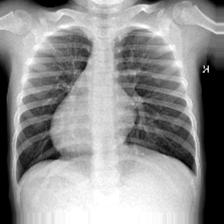

In [21]:
from PIL import Image
imgs = os.listdir(destino_train_normal)
pil_image = Image.open(os.path.join(destino_train_normal, imgs[0]))
pil_image

In [22]:
img_to_array(pil_image)

array([[[16., 16., 16.],
        [20., 20., 20.],
        [25., 25., 25.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[34., 34., 34.],
        [38., 38., 38.],
        [44., 44., 44.],
        ...,
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]],

       [[52., 52., 52.],
        [57., 57., 57.],
        [63., 63., 63.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]

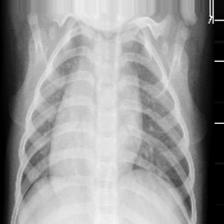

In [23]:
imgs = os.listdir(destino_test_normal)
pil_image = Image.open(os.path.join(destino_test_normal, imgs[0]))
pil_image

In [24]:
img_to_array(pil_image)

array([[[ 1.,  1.,  1.],
        [ 6.,  6.,  6.],
        [11., 11., 11.],
        ...,
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.]],

       [[ 1.,  1.,  1.],
        [ 6.,  6.,  6.],
        [11., 11., 11.],
        ...,
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.]],

       [[ 1.,  1.,  1.],
        [ 6.,  6.,  6.],
        [11., 11., 11.],
        ...,
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.]],

       ...,

       [[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [ 2.,  2.,  2.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [ 2.,  2.,  2.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [ 2.,  2.,  2.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]